In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [15]:
df=pd.read_csv('../artifacts/data_transform.csv')
df.head()

,Rating,Age,Company Name_AIBridge ML,Company Name_Accusaga,Company Name_Applied Materials,"Company Name_Arch Systems, LLC",Company Name_Barclays,Company Name_Blackcoffer (OPC) Pvt. Ltd,Company Name_Boston Consulting Group,Company Name_Drimlite,...,Revenue_Upper_Unknown,Revenue_Upper_high,Revenue_Upper_low,Revenue_Upper_med,Size_Upper_Unknown,Size_Upper_high,Size_Upper_large,Size_Upper_low,Size_Upper_med,log_avg_salary
0,4.200000,61.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,13.527830
1,3.800000,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,13.710151
2,3.900000,334.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.764218
3,4.090038,84.323326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.930652
4,4.090038,84.323326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.744045


In [16]:
df.shape

(765, 76)

In [17]:
X = df.drop('log_avg_salary', axis =1)
y = df['log_avg_salary']

In [18]:
print(df['log_avg_salary'].describe())

count    765.000000
mean      13.378312
std        0.741372
min       11.695255
25%       12.899222
50%       13.458837
75%       13.764218
max       14.930652
Name: log_avg_salary, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
numerical_columns = ['Rating', 'Age']

sc = StandardScaler()
X_train[numerical_columns] = sc.fit_transform(X_train[numerical_columns].copy())
X_test[numerical_columns] = sc.transform(X_test[numerical_columns].copy())

In [21]:
model = ElasticNet()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'l1_ratio': [0.1, 0.5, 0.9, 1.0]  # 1.0 is Lasso, 0 is Ridge
}

# Set up GridSearchCV for 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, 
                           verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean Squared Error: 0.1324


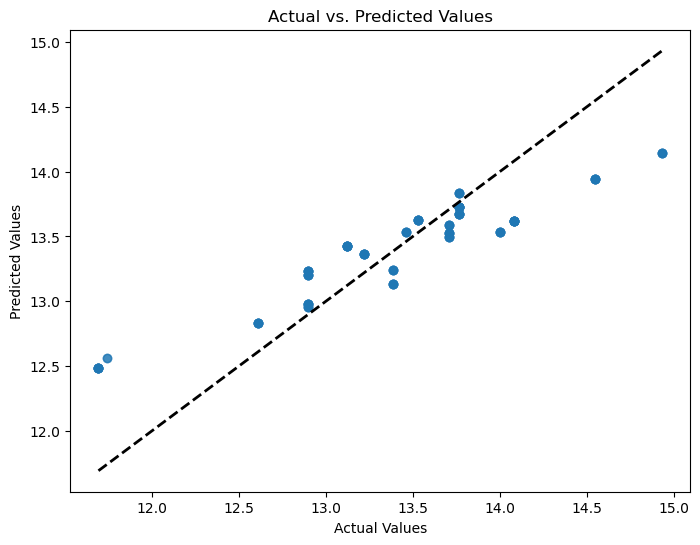

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

